# Measure Theory & Probability – Interactive Notebook

This notebook is for experimenting with concepts that i have learned today:

- σ-algebras on finite Ω
- Measures and probability measures
- Probability spaces (Ω, 𝔽, P)
- Random variables as measurable functions
- Visual intuition using plots




In [ ]:
# Basic imports 
import itertools
import math
import random

import numpy as np
import matplotlib.pyplot as plt

# Jupyter magic 
%matplotlib inline


## 1. Define a Finite Sample Space Ω

Start with a simple finite sample space, like a die or coin. Then we will build its power set and σ-algebra.

In [16]:
# TODO: Define your sample space Ω here
# Example for a fair six-sided die:
# omega = {1, 2, 3, 4, 5, 6}  # fair die

omega = {1,2,3,4,5,6} 

omega


{1, 2, 3, 4, 5, 6}

In [19]:
def powerset(iterable):
    """Return the full power set of a given finite set as a list of sets."""
    s = list(iterable)
    return [set(c) for r in range(len(s)+1) for c in itertools.combinations(s, r)]

# TODO: Build the σ-algebra 𝔽 for Ω
# For now, start with the full power set:
F = powerset(omega)


len(F), F[:5]  # size and first 5 sets


(64, [set(), {1}, {2}, {3}, {4}])

## 2. Visualizing Events as Subsets of Ω

Here, you can pick some events (subsets of Ω) and visualize them as bars or markers.
- For a die: use bar plots.
- For something else: varies.

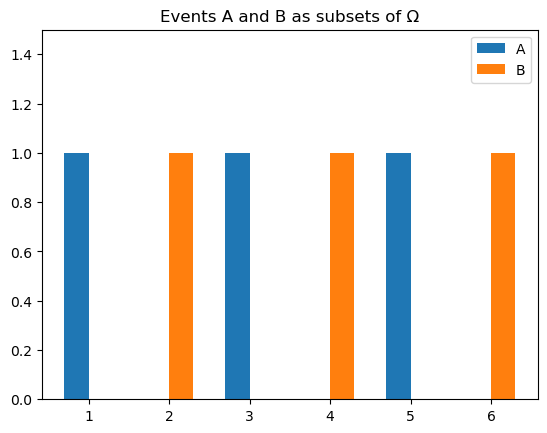

In [20]:
# TODO: Pick a few events and visualize them
# Example idea for a die:
#   - A = {1,3,5}  (odd outcomes)
#   - B = {2,4,6}  (even outcomes)

A = {1,3,5}  # e.g. {1,3,5}
B = {2,4,6}  # e.g. {2,4,6}

# Convert events to indicator vectors for plotting
labels = sorted(list(omega))
A_vals = [1 if x in A else 0 for x in labels]
B_vals = [1 if x in B else 0 for x in labels]

x = np.arange(len(labels))

fig, ax = plt.subplots()
ax.bar(x - 0.15, A_vals, width=0.3, label='A')
ax.bar(x + 0.15, B_vals, width=0.3, label='B')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.5)
ax.set_title("Events A and B as subsets of Ω")
ax.legend()
plt.show()


## 3. Define a Probability Measure P on (Ω, 𝔽)

Now define a probability measure `P` on your σ-algebra `F`.
- For a fair die: P({i}) = 1/6.
- For a biased example: choose your own weights.

Then we will compute probabilities of events and check additivity.

In [10]:
# TODO: Define a probability mass function p for singletons
# Example for a fair die:
# p_single = {w: 1/len(omega) for w in omega}

p_single = {
    w: 1/len(omega) for w in omega
}

# Check normalization
print("Sum of singleton probabilities:", sum(p_single.values()))

def P(A):
    """Probability of event A ⊆ Ω using the singleton mass function."""
    return sum(p_single[w] for w in A)

# Quick tests
# TODO: define some events and print their probabilities
A =  {1,2,3}
B =  {4,5,6}

print("P(A) =", P(A))
print("P(B) =", P(B))
print("P(A ∪ B) =", P(A | B))
print("P(A) + P(B) =", P(A) + P(B))


Sum of singleton probabilities: 0.9999999999999999
P(A) = 0.5
P(B) = 0.5
P(A ∪ B) = 0.9999999999999999
P(A) + P(B) = 1.0


## 4. Random Variables as Measurable Functions

Define a random variable `X : Ω → ℝ` and:
- Compute its distribution.
- Plot its PMF.
- Compute its expectation using `P`.

Values of X: [1, 4, 9, 16, 25, 36]
PMF of X: {1: 0.16666666666666666, 4: 0.16666666666666666, 9: 0.16666666666666666, 16: 0.16666666666666666, 25: 0.16666666666666666, 36: 0.16666666666666666}


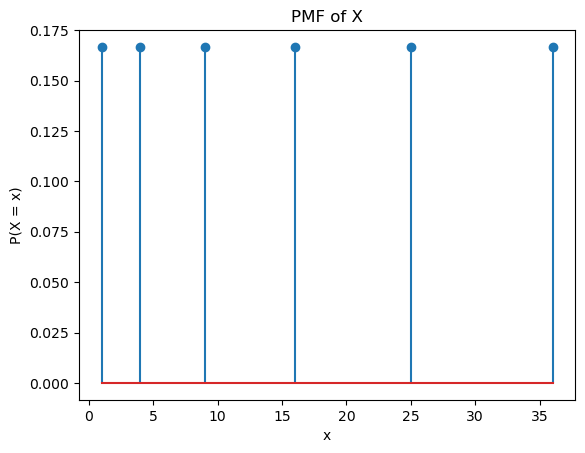

E[X] = 15.166666666666666


In [21]:
# TODO: Define a random variable X: Ω → ℝ
# Example: X(ω) = ω**2  or any function .
def X(w):
    return w**2 

# Build distribution of X
values = sorted({X(w) for w in omega})
pmf_X = {v: 0.0 for v in values}
for w in omega:
    pmf_X[X(w)] += p_single[w]

print("Values of X:", values)
print("PMF of X:", pmf_X)

# Plot PMF of X
xs = list(pmf_X.keys())
ps = [pmf_X[v] for v in xs]

fig, ax = plt.subplots()
ax.stem(xs, ps)
ax.set_xlabel("x")
ax.set_ylabel("P(X = x)")
ax.set_title("PMF of X")
plt.show()

# Compute expectation of X
E_X = sum(v * pmf_X[v] for v in pmf_X)
print("E[X] =", E_X)


## 5. Measurability Check (Finite Version)

Formally, X is measurable if sets of the form `{ω : X(ω) ≤ t}` belong to 𝔽 for all `t`.
In finite Ω, with `F = powerset(Ω)`, everything is measurable, but it's good to see the structure.

In [14]:
def is_measurable(X, F, omega, thresholds):
    """Finite check: for each t in thresholds, check {ω : X(ω) ≤ t} ∈ F."""
    for t in thresholds:
        preimage = {w for w in omega if X(w) <= t}
        if preimage not in F:
            print(f"Not measurable for threshold t={t}, preimage={preimage}")
            return False
    return True

# TODO: choose some thresholds relevant to your X
thresholds = [0,1,2,3,4,5]  # e.g. [0, 1, 2, 3, 4, 5]

print("Is X measurable w.r.t F? ->", is_measurable(X, F, omega, thresholds))


Is X measurable w.r.t F? -> True


## 6. Continuous-Style Example

Here you can simulate a continuous random variable (e.g. Uniform(0,1), Normal(0,1))
and connect it back to the idea of a probability measure on (ℝ, ℬ(ℝ)).

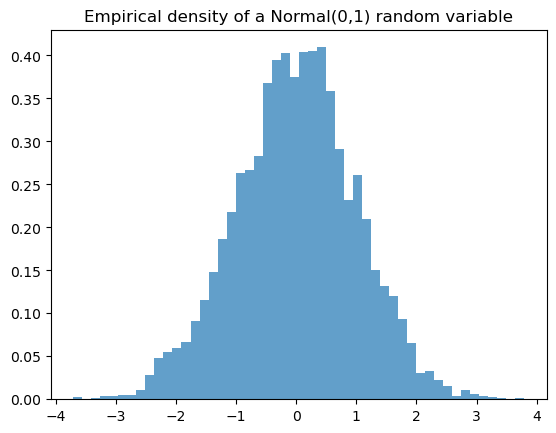

In [23]:
# TODO (optional): simulate samples from a continuous distribution
# Example: Normal(0,1)
n_samples = 5000
samples = np.random.normal(loc=0.0, scale=1.0, size=n_samples)

fig, ax = plt.subplots()
ax.hist(samples, bins=50, density=True, alpha=0.7)
ax.set_title("Empirical density of a Normal(0,1) random variable")
plt.show()


---

### Next Ideas
- Try different random variables X, Y and compare their distributions.
- Experiment with transformations: Y = g(X).
- Extend this to joint distributions on Ω × Ω.
- more advanced topics: filtrations, conditional expectation, martingales.

